In [1]:
import tensorflow as tf
import math
from IPython import display
import numpy as np
import pandas as pd
from sklearn import metrics
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from tensorflow.python.data import Dataset
tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format
print("Completed")

Completed


In [2]:
california_housing_dataframe = pd.read_csv('/Users/biplabkumardas/google-tensorflow/california_housing_train.csv', sep=",")
print("Completed")

Completed


In [3]:
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8871,-118.8,34.3,26.0,1750.0,284.0,962.0,278.0,4.6,190.4
8190,-118.4,34.3,37.0,944.0,244.0,1107.0,235.0,2.0,144.1
16471,-122.6,38.9,13.0,524.0,129.0,215.0,90.0,1.5,55.0
6692,-118.3,34.1,19.0,3013.0,1118.0,2465.0,1008.0,2.5,290.6
12351,-121.5,39.5,19.0,1537.0,329.0,617.0,274.0,1.5,50.3
...,...,...,...,...,...,...,...,...,...
11127,-121.0,37.7,33.0,3230.0,587.0,1579.0,560.0,3.6,109.7
4845,-118.1,33.8,27.0,2301.0,640.0,847.0,627.0,1.7,67.5
5524,-118.2,34.1,33.0,2907.0,797.0,3212.0,793.0,2.2,146.6
6786,-118.3,34.2,30.0,48.0,14.0,74.0,16.0,5.0,162.5


In [4]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


       total_rooms
8871        1750.0
8190         944.0
16471        524.0
6692        3013.0
12351       1537.0
...            ...
11127       3230.0
4845        2301.0
5524        2907.0
6786          48.0
5270        1007.0

[17000 rows x 1 columns]
[_NumericColumn(key='total_rooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123a0e780>,
      dtype=object)

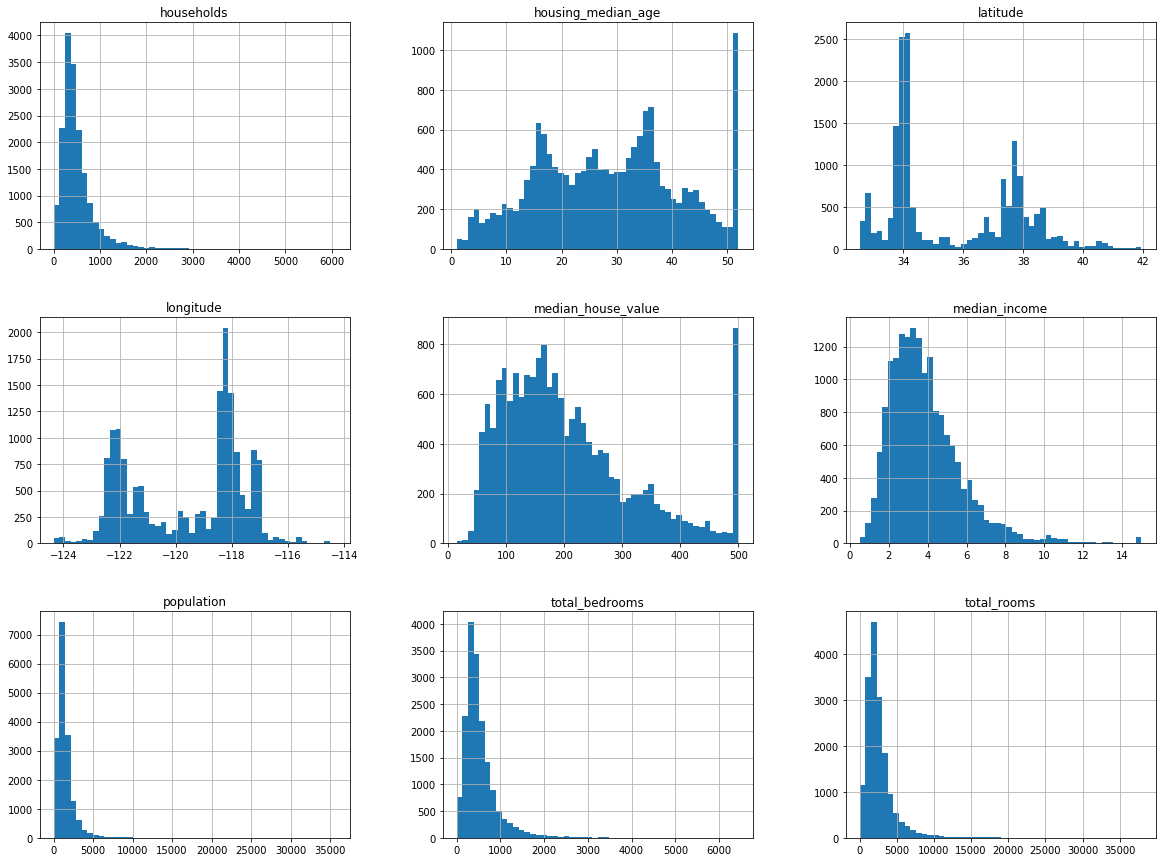

In [11]:
## getting the feature and ground truth or the labels associated with 
my_feature = california_housing_dataframe[['total_rooms']]
feature_columns = [tf.feature_column.numeric_column("total_rooms")]
print(my_feature)
print(feature_columns)
california_housing_dataframe.hist(bins=50, figsize = (20,15))

In [6]:
## define the labels
targets = california_housing_dataframe["median_house_value"]
print(targets)

8871    190.4
8190    144.1
16471    55.0
6692    290.6
12351    50.3
         ... 
11127   109.7
4845     67.5
5524    146.6
6786    162.5
5270    153.7
Name: median_house_value, Length: 17000, dtype: float64


In [7]:
## define the optimizer
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

linear_regressor = tf.estimator.LinearRegressor(
    feature_columns = feature_columns,
    optimizer = my_optimizer
)

print("Completed")

Completed


In [8]:
# preprocessing of the data
def my_input_fn(features, batch_size = 1, shuffle = True, num_epochs=None):
    features = {key:np.array(value) for key, value in dict(features).items()}
    ds = Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    if shuffle:
        ds = ds.shuffle(buffer_size=10000)
        features, labels = ds.make_one_shot_iterator().get_next()
        return features, labels

print("Completed")

Completed


In [9]:
linear_regressor.train(
    input_fn=lambda:my_input_fn(my_feature, targets),
    steps=100
)

TypeError: data type not understood

In [ ]:
prediction_input_fn =lambda: my_input_fn(my_feature, targets, num_epochs=1, shuffle=False)

# Call predict() on the linear_regressor to make predictions.
predictions = linear_regressor.predict(input_fn=prediction_input_fn)

# Format predictions as a NumPy array, so we can calculate error metrics.
predictions = np.array([item['predictions'][0] for item in predictions])

# Print Mean Squared Error and Root Mean Squared Error.
mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)
print ("Mean Squared Error (on training data):" )
mean_squared_error
print ("Root Mean Squared Error (on training data): %0.3f")  
root_mean_squared_error